# VA Unique Variables

Let's look at the variables unique to the VA dataset and see what the distributions of these variables are.

In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import re
import numpy as np
import pandas as pd
from pprint import pprint
from scipy import stats

import seaborn as sns

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score


#spacy for lemmatization
import spacy

#plotting tools
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samanthagarland/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
va = pd.read_csv("/Users/samanthagarland/Downloads/VA_Original.csv")

Index(['Unnamed: 0', 'ID', 'MD', 'Ch_IL', 'RadOnc_apt', 'ActiveSurveillance',
       'Surgery', 'Radiation', 'Brachy', 'Recom',
       ...
       'MD_hispanic', 'MD_black', 'MD_native', 'MD_asian', 'MD_pacific',
       'MD_raceother', 'MD_raceotherspecify', 'filter_$', 'As_1', 'Ch3_AS'],
      dtype='object', length=345)

In [16]:
#re-create txgot_binary
bin_vars = []
for index, row in va.iterrows():
    if row['txgot'] == 5:
        bin_var = 1
    else:
        bin_var = 0
    bin_vars.append(bin_var)
va['txgot_binary'] = bin_vars

In [55]:
def num_breakdown(df, group_var, hue_var):
    groups = df.groupby(group_var)
    
    # first groupby breakdown
    for name, group in groups:
        print('{}: '.format(str(name).upper()))
        for hue_name, hue_group in group.groupby(hue_var):
            percentage = round((len(hue_group.index) / len(group[hue_var].dropna().index)) * 100, 1)
            print('{} - {}%'.format(hue_name, percentage))
        print()

### Die1
How imporant it is to you to do everything possible to try to avoid dying of cancer?

0=not at all important, 1=1, 2=2, 3=3, 4=4, 5=5, 6=6, 7=7, 8=8, 9=9, 10=extremely important

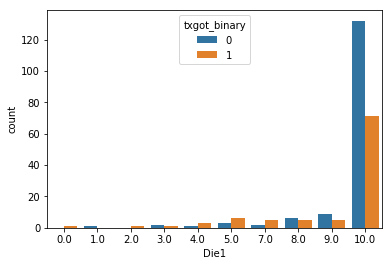

In [28]:
sns.countplot(x='Die1', data=va, hue = 'txgot_binary')

### Active1
The only responsible thing to do in this situation is to do some sort of active treatment (surgery or radiation).

1=completely disagree, 2=2, 3=3, 4=4, 5=5, 6=6, 7=completely agree

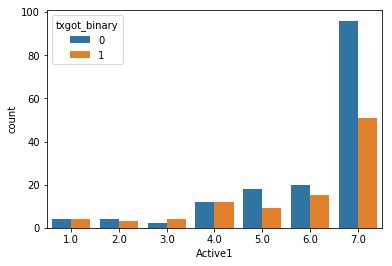

In [29]:
sns.countplot(x='Active1', data=va, hue = 'txgot_binary')

### Nowait1

It's better to do something than wait for my cancer to get worse.

1=completely disagree, 2=2, 3=3, 4=4, 5=5, 6=6, 7=completely agree

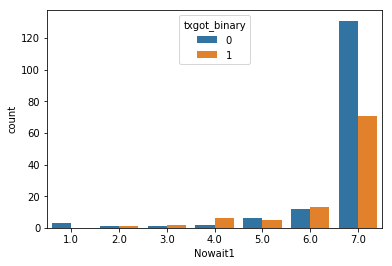

In [27]:
sns.countplot(x='Nowait1', data=va, hue = 'txgot_binary')

### Marry

What is your current marital status?

1=married or living with a civil/domestic partner, 2=widowed, 3=divorced, 4=separated from your spouse/partner, 5=never married/never in a civil/domestic partnership

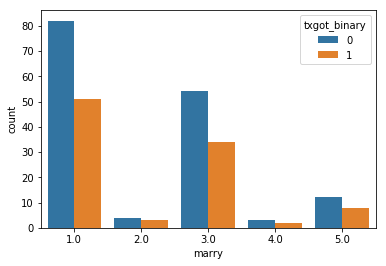

In [30]:
sns.countplot(x='marry', data=va, hue = 'txgot_binary')

In [58]:
num_breakdown(va, 'txgot_binary', 'marry')

0: 
1.0 - 52.9%
2.0 - 2.6%
3.0 - 34.8%
4.0 - 1.9%
5.0 - 7.7%

1: 
1.0 - 52.0%
2.0 - 3.1%
3.0 - 34.7%
4.0 - 2.0%
5.0 - 8.2%



### Education

What is the highest level of education you have completed?

1=none, 2=elementary school, 3=some high school, but no diploma, 4=high school (Diploma or GED), 5=trade school, 6=some college, but no degree, 7=associate's degree (AA, AS, etc.), 8=bachelor's degree (BS, BA, etc.), 9=Master's degree (MA, MPH, etc.), 10=doctoral/professional degree (PhD, MD, etc.)

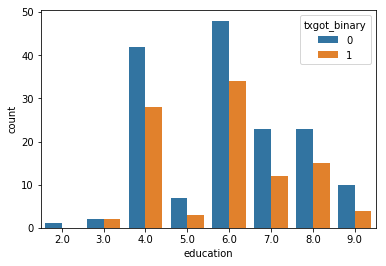

In [21]:
sns.countplot(x='education', data=va, hue = 'txgot_binary')

In [59]:
num_breakdown(va, 'txgot_binary', 'education')

0: 
2.0 - 0.6%
3.0 - 1.3%
4.0 - 26.9%
5.0 - 4.5%
6.0 - 30.8%
7.0 - 14.7%
8.0 - 14.7%
9.0 - 6.4%

1: 
3.0 - 2.0%
4.0 - 28.6%
5.0 - 3.1%
6.0 - 34.7%
7.0 - 12.2%
8.0 - 15.3%
9.0 - 4.1%



### Read2

Did you read the decision aid before coming to today's appointment?

0 = no, 1 = yes

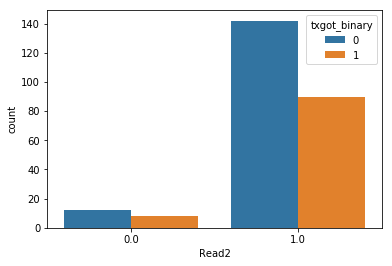

In [31]:
sns.countplot(x='Read2', data=va, hue = 'txgot_binary')

In [60]:
num_breakdown(va, 'txgot_binary', 'Read2')

0: 
0.0 - 7.8%
1.0 - 92.2%

1: 
0.0 - 8.2%
1.0 - 91.8%



### Timeda2

About how much time did you spend looking at or reading the decision aid?

1=less than 30 minutes, 2=30-60 minutes, 3=1-2 hours, 4=more than 2 hours

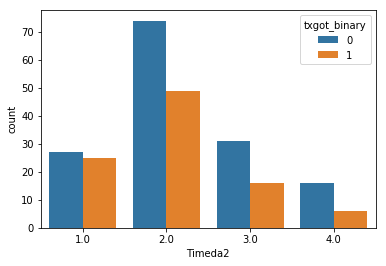

In [32]:
sns.countplot(x='Timeda2', data=va, hue = 'txgot_binary')

### SDM2

We would like to learn more about how you would make this decision [about what type of prostate cancer treatment to undergo].

1=My doctor(s) will make the decision with little input from me, 2=My doctor(s) will make the decision but will seriously consider my opinion, 3=My doctor(s) and I will make the decision together, 4=I will make the decision after seriously considering my doctor(s) opinion, 5=I will make the decision with little input from my doctor(s)

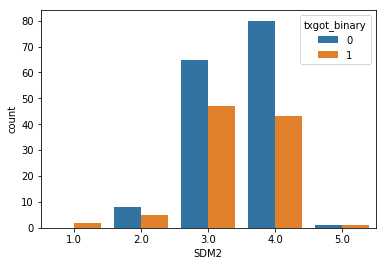

In [33]:
sns.countplot(x='SDM2', data=va, hue = 'txgot_binary')

### Whatrec3

What was the recommendation?

1=surgery, 2= external beam radiation, 3= brachytherapy, 4=watchful waiting, 5=other

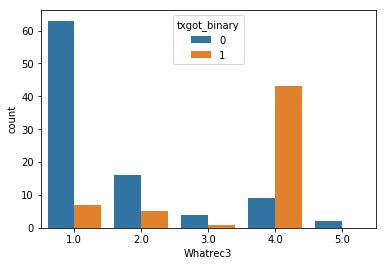

In [25]:
sns.countplot(x='Whatrec3', data=va, hue = 'txgot_binary')

Makes sense, more of those who were recommended for active surveillance (4) got active surveillance.

### Iopinion3

I gave my opinion (agreement or disagreement) about the types of test or treatment that my doctor ordered.

0=disagree, 1=agree

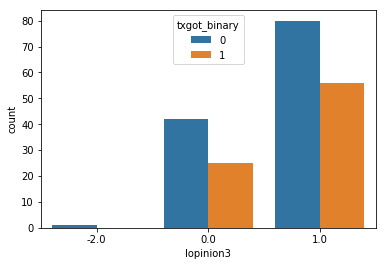

In [26]:
sns.countplot(x='Iopinion3', data=va, hue = 'txgot_binary')

In [61]:
num_breakdown(va, 'txgot_binary', 'Iopinion3')

0: 
-2.0 - 0.8%
0.0 - 34.1%
1.0 - 65.0%

1: 
0.0 - 30.9%
1.0 - 69.1%



No clue where the -2 comes from, but categories seem equalish.

### Adv3

I know the advantages of treatment or not having treatment.  

1=strongly disagree, 2=disagree, 3=neither agree nor disagree, 4=agree, 5=strongly agree

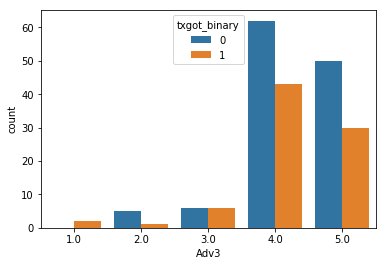

In [35]:
sns.countplot(x='Adv3', data=va, hue = 'txgot_binary')

### irespmd

I respect my doctor a great deal.

1=strongly disagree, 2=disagree, 3=neither agree nor disagree, 4=agree, 5=strongly agree

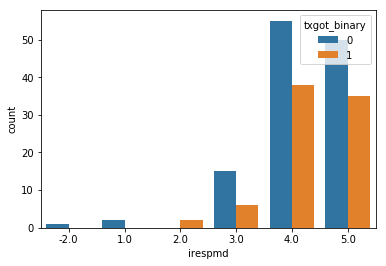

In [36]:
sns.countplot(x = 'irespmd', data=va, hue = 'txgot_binary')

### Agree3

My doctor and I agreed about which treatment (or no treatment) was best for me.  

1=strongly disagree, 2=disagree, 3=neither agree nor disagree, 4=agree, 5=strongly agree

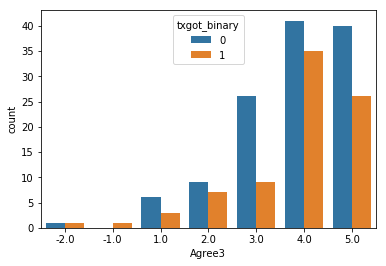

In [38]:
sns.countplot(x = 'Agree3', data=va, hue = 'txgot_binary')

In [62]:
num_breakdown(va, 'txgot_binary', 'Agree3')

0: 
-2.0 - 0.8%
1.0 - 4.9%
2.0 - 7.3%
3.0 - 21.1%
4.0 - 33.3%
5.0 - 32.5%

1: 
-2.0 - 1.2%
-1.0 - 1.2%
1.0 - 3.7%
2.0 - 8.5%
3.0 - 11.0%
4.0 - 42.7%
5.0 - 31.7%



### Decide3

The doctor gave me a chance to decide which treatment I thought was best for me.  

1=strongly disagree, 2=disagree, 3=neither agree nor disagree, 4=agree, 5=strongly agree

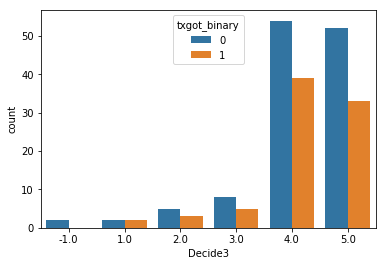

In [39]:
sns.countplot(x = 'Decide3', data=va, hue = 'txgot_binary')

## Avoid Variables

### Avdsurg3

What number would you use to rate how important is to you to avoid surgery?

0=not at all important, 1=1, 2=2, 3=3, 4=4, 5=5, 6=6, 7=7, 8=8, 9=9, 10=extremely important

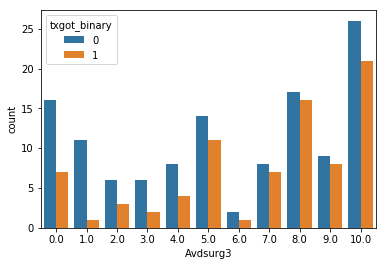

In [41]:
sns.countplot(x = 'Avdsurg3', data=va, hue = 'txgot_binary')

In [56]:
num_breakdown(va, 'txgot_binary', 'Avdsurg3')

0: 
0.0 - 13.0%
1.0 - 8.9%
2.0 - 4.9%
3.0 - 4.9%
4.0 - 6.5%
5.0 - 11.4%
6.0 - 1.6%
7.0 - 6.5%
8.0 - 13.8%
9.0 - 7.3%
10.0 - 21.1%

1: 
0.0 - 8.6%
1.0 - 1.2%
2.0 - 3.7%
3.0 - 2.5%
4.0 - 4.9%
5.0 - 13.6%
6.0 - 1.2%
7.0 - 8.6%
8.0 - 19.8%
9.0 - 9.9%
10.0 - 25.9%



### Avdpee3

When choosing a treatment for your early stage prostate cancer, how important is it to you to avoid problems with dripping or leaking urine?

0=not at all important, 1=1, 2=2, 3=3, 4=4, 5=5, 6=6, 7=7, 8=8, 9=9, 10=extremely important

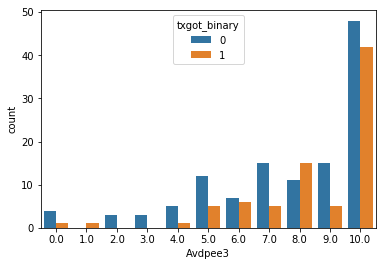

In [42]:
sns.countplot(x = 'Avdpee3', data=va, hue = 'txgot_binary')

### Avdtime3

When choosing a treatment for your early stage prostate cancer, how important is it to you not spend a lot of time in treatment or recovery?

0=not at all important, 1=1, 2=2, 3=3, 4=4, 5=5, 6=6, 7=7, 8=8, 9=9, 10=extremely important

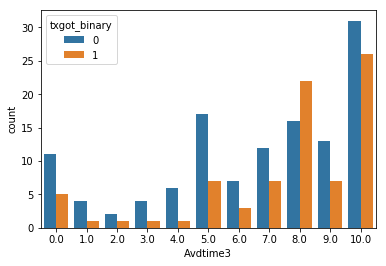

In [43]:
sns.countplot(x = 'Avdtime3', data=va, hue = 'txgot_binary')

### Avoided3

When choosing a treatment for your early stage prostate cancer, how important is it to you to avoid sexual problems?

0=not at all important, 1=1, 2=2, 3=3, 4=4, 5=5, 6=6, 7=7, 8=8, 9=9, 10=extremely important

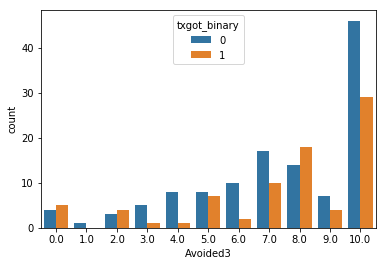

In [44]:
sns.countplot(x = 'Avoided3', data=va, hue = 'txgot_binary')

### Avoidrec3

When choosing a treatment for your early stage prostate cancer, how important is it to you to avoid problems with bowel function?

0=not at all important, 1=1, 2=2, 3=3, 4=4, 5=5, 6=6, 7=7, 8=8, 9=9, 10=extremely important

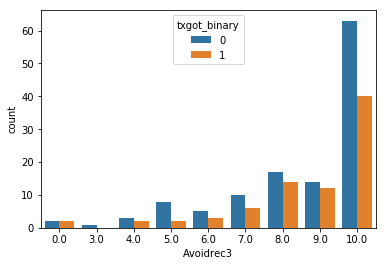

In [45]:
sns.countplot(x = 'Avoidrec3', data=va, hue = 'txgot_binary')

### Impmdrec3

What number would you use to rate how important it is to you to do what the doctor thinks is best for your early stage prostate cancer?

0=not at all important, 1=1, 2=2, 3=3, 4=4, 5=5, 6=6, 7=7, 8=8, 9=9, 10=extremely important

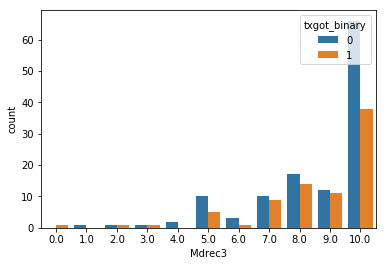

In [48]:
sns.countplot(x = 'Mdrec3', data=va, hue = 'txgot_binary')

### Imppart3

What number would you use to rate how important is it to you to do what your spouse or significant other thinks is best for your early stage prostate cancer?

0=not at all important, 1=1, 2=2, 3=3, 4=4, 5=5, 6=6, 7=7, 8=8, 9=9, 10=extremely important

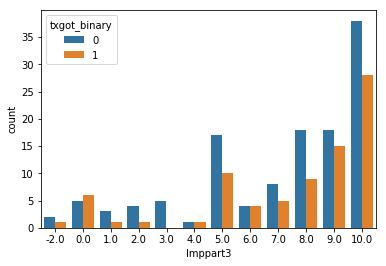

In [50]:
sns.countplot(x = 'Imppart3', data=va, hue = 'txgot_binary')

### Worryse3

How worried are you about experiencing a side effect of your cancer treatment?

1=not at all worried, 2=2, 3=3, 4=4, 5=5, 6=6, 7=extremely worried

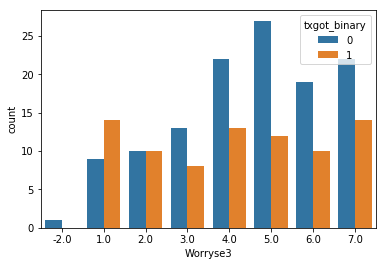

In [51]:
sns.countplot(x = 'Worryse3', data=va, hue = 'txgot_binary')

### Worrydie3

How worried are you about dying from prostate cancer?

1=not at all worried, 2=2, 3=3, 4=4, 5=5, 6=6, 7=extremely worried

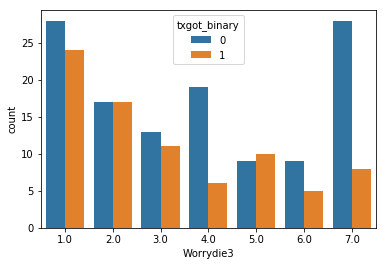

In [53]:
sns.countplot(x = 'Worrydie3', data=va, hue = 'txgot_binary')

In [57]:
num_breakdown(va, 'txgot_binary', 'Worrydie3')

0: 
1.0 - 22.8%
2.0 - 13.8%
3.0 - 10.6%
4.0 - 15.4%
5.0 - 7.3%
6.0 - 7.3%
7.0 - 22.8%

1: 
1.0 - 29.6%
2.0 - 21.0%
3.0 - 13.6%
4.0 - 7.4%
5.0 - 12.3%
6.0 - 6.2%
7.0 - 9.9%

